In [13]:
import a_funciones as funciones  ###archivo de funciones propias
import pandas as pd ### para manejo de datos
import joblib
import openpyxl ## para exportar a excel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_models = pd.read_csv('data//df_employees_models.csv')

In [15]:
if __name__=="__main__":
    df_despliegue = pd.read_csv('data//test.csv')
    
    df_despliegue['Age'] = df_despliegue['Age'] + 1
    
     ####Otras transformaciones en python (imputación, dummies y seleccion de variables)
    df_t = funciones.preparar_datos(df_despliegue)
    
     ##Cargar modelo y predecir
    rf_despliegue = joblib.load("salidas\\rf_final.pkl")
    predicciones=rf_despliegue.predict(df_t)
    pd_pred=pd.DataFrame(predicciones, columns=['pred_ret_2017'])
    
    ###Crear base con predicciones ####
    perf_pred=pd.concat([df_despliegue['EmployeeID'],df_t, pd_pred],axis=1)
    
    df_pred = perf_pred.loc[:,['EmployeeID', 'pred_ret_2017']]
    
    ####ver_predicciones ###
    emp_pred=df_pred['pred_ret_2017']
    emp_pred = pd.DataFrame(emp_pred, columns=['pred_ret_2017'])
    emp_pred.set_index(df_despliegue['EmployeeID'], inplace=True)
    emp_pred = emp_pred.reset_index() 
    
    emp_pred.to_excel("salidas\\prediccion.xlsx")   #### exportar predicciones mas bajas y variables explicativas
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BusinessTravel  4410 non-null   object
 1   Department      4410 non-null   object
 2   EducationField  4410 non-null   object
 3   MaritalStatus   4410 non-null   object
dtypes: object(4)
memory usage: 137.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   float64
 1   Age                      4410 non-null   float64
 2   DistanceFromHome         4410 non-null   float64
 3   Education                4410 non-null   float64
 4   JobLevel                 4410 non-null   float64
 5   MonthlyIncome            4410 non-null   float64
 6   NumCompaniesWorked       4410 non-null   flo

In [16]:
emp_pred

,EmployeeID,pred_ret_2017
0,8246,1
1,8255,1
2,8260,1
3,8264,1
4,8279,1
...,...,...
4405,8384,1
4406,8390,1
4407,8391,1
4408,8405,1


In [17]:
emp_pred['pred_ret_2017'].value_counts()

pred_ret_2017
0    3724
1     686
Name: count, dtype: int64

In [18]:
emp_pred1 = emp_pred[(emp_pred['EmployeeID'] >= 4410)&(emp_pred['pred_ret_2017'] == 1)]
emp_pred1

,EmployeeID,pred_ret_2017
0,8246,1
1,8255,1
2,8260,1
3,8264,1
4,8279,1
...,...,...
4404,8383,1
4405,8384,1
4406,8390,1
4407,8391,1


In [49]:
# Filtro de empleados que se retiran en el 2017 ordenados por el ID
emp_pred2 = emp_pred[emp_pred['pred_ret_2017'] == 1]
emp_pred2 = emp_pred2.sort_values(by=['EmployeeID'])
emp_pred2

,EmployeeID,pred_ret_2017
2757,653,1
488,2123,1
2229,3593,1
3789,4412,1
3790,4417,1
...,...,...
3701,8779,1
3726,8797,1
3728,8799,1
3770,8802,1


In [26]:
# Guardar los valores de 'EmployeeID' en una lista
col_ID = emp_pred2['EmployeeID'].tolist()

C:\Users\srest\AppData\Local\Temp\ipykernel_19876\969359448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=emp_pred, x='pred_ret_2017', palette=['#979dac', '#006e90'])


([<matplotlib.axis.XTick at 0x23725042210>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

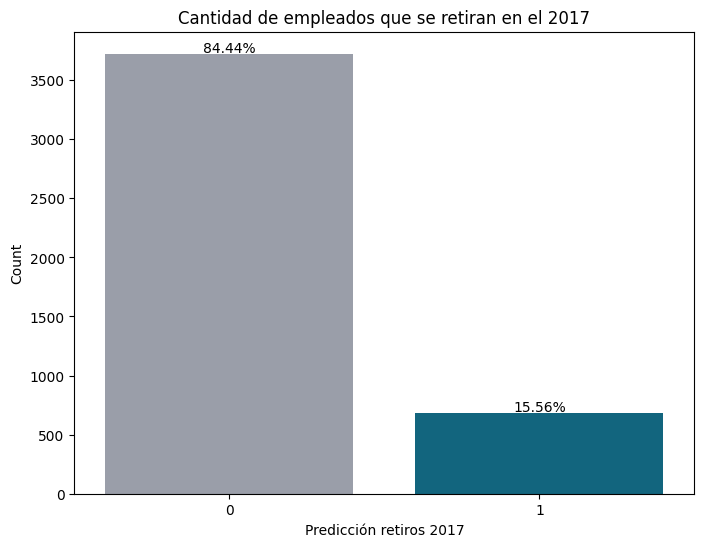

In [6]:
# Contar las frecuencias de cada valor en la columna 'pred_ret_2017'
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=emp_pred, x='pred_ret_2017', palette=['#979dac', '#006e90'])

# Crear el gráfico de barras
plt.xlabel('Predicción retiros 2017')
plt.ylabel('Count')
plt.title('Cantidad de empleados que se retiran en el 2017')

# Calcula las frecuencias y porcentajes
counts = emp_pred['pred_ret_2017'].value_counts()
total = len(emp_pred)
percentages = (counts / total * 100).reindex([0, 1], fill_value=0)


# Configura los ticks y etiquetas
ax.set_xticks([0, 1])
ax.set_xticklabels(['Permanece', 'Se Retira'])

for tick in [0, 1]:
    count = counts.get(tick, 0)
    percentage = percentages.get(tick, 0)
    ax.text(tick, count + 10, f'{percentage:.2f}%', ha='center', color='black')
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)


En este caso, se obtiene la predicción de que el 15.56% de los empleados se retirarán en 2017.

In [27]:
# Dataframe completo con empleados que se retiran en el 2017
df_retiros_2017 = df_despliegue[df_despliegue['EmployeeID'].isin(col_ID)]
df_retiros_2017

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsSinceLastPromotion,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement
0,8246,19,Travel_Frequently,Research & Development,3,5,Medical,1,Single,24790,1,12,1,2,0,2,4,4,2
1,8255,36,Travel_Rarely,Research & Development,2,3,Life Sciences,3,Married,23210,9,12,1,0,6,4,1,3,3
2,8260,36,Travel_Rarely,Research & Development,9,3,Life Sciences,2,Divorced,173990,6,12,0,3,2,1,4,2,1
3,8264,41,Travel_Rarely,Sales,16,4,Marketing,1,Single,36330,3,16,2,0,0,1,1,1,3
4,8279,36,Travel_Frequently,Research & Development,17,4,Medical,1,Single,54720,3,11,1,3,6,4,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,8383,35,Travel_Frequently,Research & Development,2,1,Life Sciences,1,Married,134990,4,23,2,2,0,4,1,2,4
4405,8384,38,Travel_Rarely,Research & Development,24,3,Life Sciences,1,Single,137580,1,11,1,5,0,4,1,1,3
4406,8390,27,Travel_Rarely,Human Resources,2,1,Technical Degree,3,Married,65780,0,15,2,3,1,4,2,3,2
4407,8391,47,Travel_Rarely,Research & Development,10,3,Medical,1,Married,44220,4,11,1,2,3,4,2,4,3


C:\Users\srest\AppData\Local\Temp\ipykernel_7408\528960292.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='MonthlyIncome', data=df_retiros_2017, palette=['#979dac'], ax=axes[1])


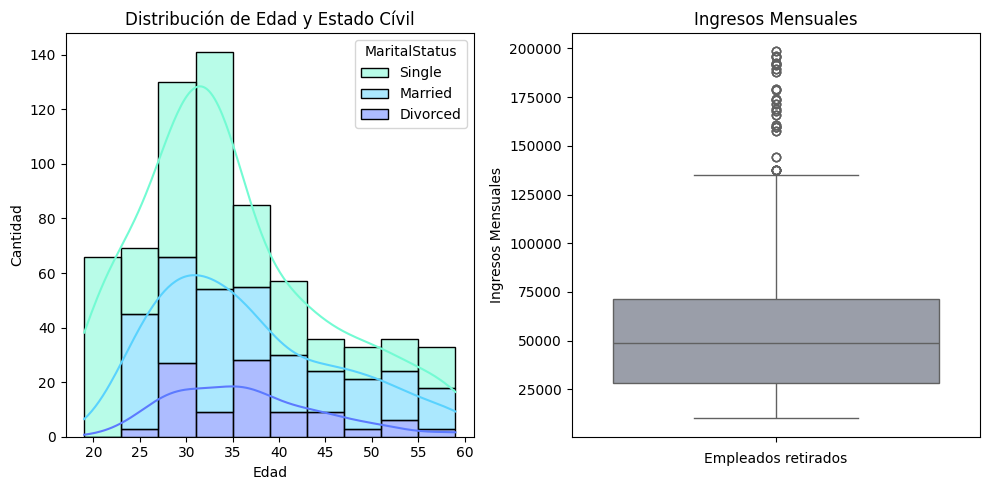

In [50]:
# Configurar el tamaño de la figura y crear subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de barras con densidad para Edad y MaritalStatus (Permanece)
sns.histplot(
    data=df_retiros_2017, x='Age', hue='MaritalStatus',
    bins=10, palette=['#73fbd3', '#59d2fe', '#5c7aff'], multiple='stack', ax=axes[0], kde=True
)
axes[0].set_title('Distribución de Edad y Estado Cívil')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Cantidad')

# Gráfico de caja para 'MonthlyIncome'
sns.boxplot(y='MonthlyIncome', data=df_retiros_2017, palette=['#979dac'], ax=axes[1])
axes[1].set_title('Ingresos Mensuales')
axes[1].set_xlabel('Empleados retirados')
axes[1].set_ylabel('Ingresos Mensuales')

# Ajustar el espaciado
plt.tight_layout()
plt.show()

In [52]:
df_retiros_2017['Age'].mean(), df_retiros_2017['MonthlyIncome'].mean()

(34.64139941690962, 61872.82798833819)

Como se vio en el archivo de modelos, se evidencia que algunas de las variables con mayor peso en la predicción son la edad y los ingresos mensuales. Así mismo, en búsqueda de encontrar explicación a las predicciones, se evidencia que la edad de los empleados que se retiran en 2017 posee una media de 35 años aproximadamente, y se mantienen como retiros mayoritarios las personas solteras y el sueldo mensual promedio es de $ 61.872. Esto deja concluir que ambas variables presentan un comportamiento similar al presentado en el entrenamiento.